### <u>Libraries & Modules</u>

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier


### <u>Part 1: Breast Cancer Diagnosis</u>
#### 1.1 Data Munging

In [29]:
train_df = (pd.read_csv("data/wisconsin_data/train_wbcd.csv")).drop('Patient_ID', axis=1)
train = train_df.values

test_df = (pd.read_csv("data/wisconsin_data/test_wbcd.csv")).drop('Patient_ID', axis=1)
test = test_df.values

print 'There are {} datapoints in training set and {} columns which include label and features.'.format(train.shape[0],train.shape[1])
print 
print 'Check first row (datapoint) in training set:'
print train[:1]
print 
print 'Check first row (datapoint) in test set:'
print test[:1]
print 
print 'The first element is the label, therefore:'
print "No. of features in training data is {}".format(train.shape[1] - 1)
print "No. of features in test data is {}".format(test.shape[1] - 1)

There are 100 datapoints in training set and 31 columns which include label and features.

Check first row (datapoint) in training set:
[['B' 14.02 15.66 89.59 606.5 0.07966000000000001 0.055810000000000005
  0.02087 0.02652 0.1589 0.05586 0.2142 0.6549 1.6059999999999999 19.25
  0.004837 0.009238 0.009212999999999999 0.010759999999999999 0.01171
  0.002104 14.91 19.31 96.53 688.9 0.1034 0.1017 0.0626 0.08216 0.2136
  0.0671]]

Check first row (datapoint) in test set:
[['B' 8.597000000000001 18.6 54.09 221.2 0.1074 0.05847 0.0 0.0 0.2163
  0.07359 0.3368 2.7769999999999997 2.222 17.81 0.02075 0.01403 0.0 0.0
  0.06146 0.0068200000000000005 8.952 22.44 56.65 240.1 0.1347 0.07767 0.0
  0.0 0.3142 0.08116]]

The first element is the label, therefore:
No. of features in training data is 30
No. of features in test data is 30


Checking the class distribution:

In [30]:
print "\t\t\tFrequency"
print "\t\t  B (0)\t\t  M (1)"
print "Training set\t{:f}\t{:f}".format((train == 'B').sum(),(train == 'M').sum())
print "Test set\t{:f}\t{:f}".format((test == 'B').sum(),(test == 'M').sum())

			Frequency
		  B (0)		  M (1)
Training set	58.000000	42.000000
Test set	14.000000	6.000000


The class distribution on training and test sets shows that there are more samples with B cancer diagnosis. This is an imbalanced class problem since the classes (B and M) are not represented equally.

Checking for missing values in data sets:

In [31]:
def na_count(df, dataset):
    counter = 0
    for i in range(len(df.columns)):
        na_count = df.iloc[:,i].isnull().sum()
        if na_count >= 1:
            print '{} Feature {} has {} missing value(s)'.format(dataset, df.columns[i],str(na_count))
            counter += 1
    if counter == 0:
        print 'No column has NA in {}'.format(dataset)
        
na_count(pd.DataFrame(train), "Training Data:")
na_count(pd.DataFrame(test), "Test Data:")

Training Data: Feature 21 has 2 missing value(s)
Test Data: Feature 21 has 1 missing value(s)


Check data distribution of feature 21:

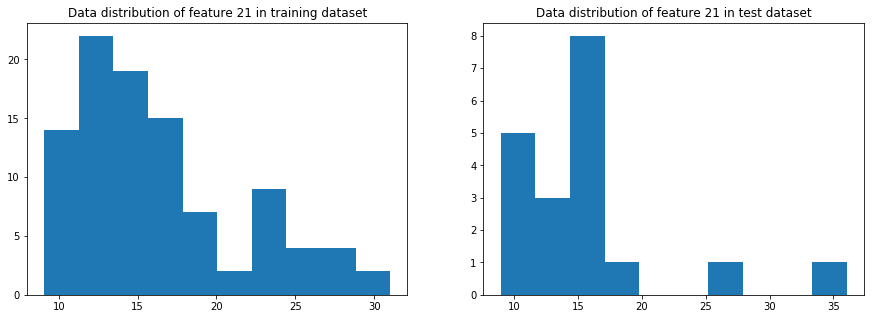

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(train_df.iloc[:,21].dropna())
ax[0].set_title('Data distribution of feature 21 in training dataset')

ax[1].hist(test_df.iloc[:,21].dropna())
ax[1].set_title('Data distribution of feature 21 in test dataset')

plt.show()

Since the distributions are positively skewed, the best option to replace the missing entry is using the median as mean will be influenced by the distribution tail (high values).

In [33]:
train_df.iloc[:,21] = train_df.iloc[:,21].fillna(train_df.iloc[:,21].median())
test_df.iloc[:,21] = test_df.iloc[:,21].fillna(test_df.iloc[:,21].median())
na_count(train_df, "Training Data")
na_count(test_df, "Test Data")

No column has NA in Training Data
No column has NA in Test Data


Normalize the training and test data

In [34]:
features = list(train_df.iloc[0:,2:])

def scaler(df, columns):    
        std_scale = preprocessing.StandardScaler().fit(df[columns])
        df_std_mat = std_scale.transform(df[columns])
        df_std = pd.DataFrame(df_std_mat, columns = columns)
        df_std['Diagnosis'] = df['Diagnosis']
        return df_std
    
trainNorm = scaler(train_df, features)
testNorm = scaler(test_df, features)


#### 1.2 Logistic Regression

In [35]:
#Create the training/testing data and labels
trainNorm = trainNorm.replace(['B', 'M'], [0, 1]) 
Xtrain = trainNorm.iloc[0:,0:29]
ytrain = trainNorm.iloc[0:,29:]

testNorm = testNorm.replace(['B', 'M'], [0, 1]) 
Xtest = testNorm.iloc[0:,0:29]
ytest = testNorm.iloc[0:,29:]

print type(Xtrain)

<class 'pandas.core.frame.DataFrame'>


- using L1 regularization, alpha = 0.1

In [41]:
# initialize the logisitc regression model. 
logistic1 = LogisticRegression(C=10, penalty='l1')

# fit model
l1 = logistic1.fit(Xtrain, ytrain)

pred_label = l1.predict(Xtest)
true_label = ytest


# metrics for test set
test_recall = metrics.recall_score(true_label, pred_label)
test_precision = metrics.precision_score(true_label, pred_label)
test_accuracy = metrics.accuracy_score(true_label, pred_label)
test_f_score = metrics.f1_score(true_label, pred_label)


print "Metrics\t\tScore"
print "Recall\t\t{:f}".format(test_recall)
print "Precision\t{:f}".format(test_precision)
print "Accuracy\t{:f}".format(test_accuracy)
print "F1 score\t{:f}".format(test_f_score)

print 
print 'Confusion matrix:'
print metrics.confusion_matrix(true_label, pred_label)
print 'AUC:'
print roc_auc_score(true_label, pred_label)


Metrics		Score
Recall		0.833333
Precision	0.833333
Accuracy	0.900000
F1 score	0.833333

Confusion matrix:
[[13  1]
 [ 1  5]]
AUC:
0.880952380952


- using L2 regularization, lambda = 0.1

In [13]:
# initialize the logisitc regression model. 
logistic2 = LogisticRegression(C=10, penalty='l2')

# fit model
l2 = logistic2.fit(Xtrain, ytrain)

pred_label = l2.predict(Xtest)
true_label = ytest

#model evaluation
recall = metrics.recall_score(true_label, pred_label)
precision = metrics.precision_score(true_label, pred_label)
accuracy = metrics.accuracy_score(true_label, pred_label)
f_score = metrics.f1_score(true_label, pred_label)

print 'Recall:{}'.format(recall)
print 'Precision:{}'.format(precision)
print 'Accuracy:{}'.format(accuracy)
print 'F1 score:{}'.format(f_score)
print 
print 'Confusion matrix:'
print metrics.confusion_matrix(true_label, pred_label)
print 'AUC:'
print roc_auc_score(true_label, pred_label)

Recall:0.833333333333
Precision:0.833333333333
Accuracy:0.9
F1 score:0.833333333333

Confusion matrix:
[[13  1]
 [ 1  5]]
AUC:
0.880952380952


#### 1.3 Choosing the best hyper-parameters

- L1<br>Choosing the best alpha value from the following set: {0.1,1,3,10,33,100,333,1000, 3333, 10000, 33333}

In [14]:
#alpha values
alpha = [0.1,1,3, 10,33,100,333,1000, 3333, 10000, 33333]

#data
trainNorm = scaler(train_df, features)
trainNorm = trainNorm.replace(['B', 'M'], [0, 1]) 

Xtrain = trainNorm[features]
ytrain = trainNorm['Diagnosis']

testNorm = scaler(test_df, features)
testNorm = testNorm.replace(['B', 'M'], [0, 1]) 

Xtest = testNorm[features]
ytest = testNorm['Diagnosis']


In [15]:
# define function
def runLRmodel(trials, data, predictors, label, penalty_type, penalty_score):
    
    model_acc     = 0
    
    for i in range(0,trials):
        Dtrain, Dtest = train_test_split(data, test_size=0.3)
        lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type)
        lr.fit(Dtrain[predictors], Dtrain[label])
        y_predict = lr.predict(Dtest[predictors])
        model_acc += accuracy_score(y_predict, Dtest[label])
        
    model_acc /= trials
    
    return np.round(model_acc, decimals=2)


Choosing the best alpha value:

In [48]:
l1_acc = np.zeros(len(alpha))
index = 0

#L1 regularization
for l in alpha:
    l1_acc[index] = runLRmodel(100, trainNorm, features, 'Diagnosis', 'l1', float(l))
    index += 1
    
# penalty at which validation accuracy is maximum
max_index_l1  = np.argmax(l1_acc)
best_alpha = alpha[max_index_l1]


Using best alpha value to refit the model and find top 5 features:

In [49]:
print "Alpha: {}".format(alpha)
print "Acc: {}".format(l1_acc)
print "Best Alpha: {}".format(best_alpha)
print 

l1 = LogisticRegression(C=1/best_alpha, penalty='l1')
l1.fit(Xtrain, ytrain)
pred_label = l1.predict(Xtest)
true_label = ytest

#model evaluation
recall = recall_score(true_label, pred_label)
precision = precision_score(true_label, pred_label)
accuracy = accuracy_score(true_label, pred_label)
f_score = f1_score(true_label, pred_label)

print 'Precision:{}'.format(precision)
print 'Accuracy:{}'.format(accuracy)

def top_5_feature(model):
    coeff = abs(np.round(model.coef_[0,], decimals=2))
    coeff_dict = dict()
    index = 0
    for i in features[0:30]:
        coeff_dict[i] = str(list(coeff)[index])
        index += 1
    top_5 = sorted([(v,k) for k,v in coeff_dict.items()], reverse=True)[0:5]
    rank = 1
    for i in top_5:
        print '{} '.format(str(rank)), 'Weight, Feature{}'.format(i)
        rank += 1

        

print 'Top 5 features in decreasing order of feature weights:'
top_5_feature(l1)
print 

print 'Confusion matrix:'
print metrics.confusion_matrix(pred_label, true_label)
print 'AUC:'
print roc_auc_score(true_label, pred_label)
print 

Alpha: [0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333]
Acc: [ 0.99  0.99  0.97  0.95  0.59  0.56  0.57  0.58  0.58  0.57  0.58]
Best Alpha: 0.1

Precision:0.833333333333
Accuracy:0.9

Top 5 features in decreasing order of feature weights:
1  Weight, Feature('6.45', 'f23')
2  Weight, Feature('3.93', 'f22')
3  Weight, Feature('2.44', 'f21')
4  Weight, Feature('2.42', 'f25')
5  Weight, Feature('1.5', 'f4')

Confusion matrix:
[[13  1]
 [ 1  5]]
AUC:
0.880952380952



#### Discussion for regularized model with L1 penalty

The accuracy of this model drops signficantly from alpha = 33 to alpha = 3333. Higher alpha values produce more regularized models and hence underfitting. Therefore, it can be said that the model will be underfitted if the alpha value is large.

Choosing alpha value = 0.1 might result overfitted model since the larger the C value (from small alpha value), the less regularized the model.

Since alpha value = 1 gives the same model performance as alpha = 0.1, it is probably the better choice to avoid overfitted models.

- L2<br>Choosing the best alpha value from the following set: {0.001, 0.003, 0.01, 0.03, 0.1,0.3,1,3,10,33}

In [50]:
#lambda values
lambda_val = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3,  1, 3, 10, 33]

#data
trainNorm = scaler(train_df, features)
trainNorm = trainNorm.replace(['B', 'M'], [0, 1]) 

Xtrain = trainNorm[features]
ytrain = trainNorm['Diagnosis']

testNorm = scaler(test_df, features)
testNorm = testNorm.replace(['B', 'M'], [0, 1]) 

Xtest = testNorm[features]
ytest = testNorm['Diagnosis']

In [52]:
l2_acc = np.zeros(len(lambda_val))
index = 0

#L2 regularization
for l in lambda_val:
    l2_acc[index] = runLRmodel(100, trainNorm, features, 'Diagnosis', 'l2', float(l))
    index += 1
    
# penalty at which validation accuracy is maximum
max_index_l2  = np.argmax(l2_acc)
best_lambda = lambda_val[max_index_l2]


Using best lambda value to refit the model and find top 5 features:

In [53]:
print "Lambda: {}".format(lambda_val)
print "Acc: {}".format(l2_acc)
print 
print "Best Lambda: {}".format(best_lambda)
print 
l2 = LogisticRegression(C=1/best_lambda, penalty='l2')
l2.fit(Xtrain, ytrain)
pred_label = l2.predict(Xtest)
true_label = ytest

#model evaluation
recall = recall_score(true_label, pred_label)
precision = precision_score(true_label, pred_label)
accuracy = accuracy_score(true_label, pred_label)
f_score = f1_score(true_label, pred_label)

#print 'Recall:{}'.format(recall)
print 'Precision:{}'.format(precision)
print 'Accuracy:{}'.format(accuracy)
#print 'F1 score:{}'.format(f_score)
print 

def top_5_feature(model):
    coeff = abs(np.round(model.coef_[0,], decimals=2))
    coeff_dict = dict()
    index = 0
    for i in features[0:30]:
        coeff_dict[i] = str(list(coeff)[index])
        index += 1
    top_5 = sorted([(v,k) for k,v in coeff_dict.items()], reverse=True)[0:5]
    rank = 1
    for i in top_5:
        print '{} '.format(str(rank)), 'Weight, Feature{}'.format(i)
        rank += 1

        

print 'Top 5 features in decreasing order of feature weights:'
top_5_feature(l1)
print 

print 'Confusion matrix:'
print metrics.confusion_matrix(true_label, pred_label)
print 'AUC:'
print roc_auc_score(true_label, pred_label)
print 

Lambda: [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 33]
Acc: [ 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.98  0.97]

Best Lambda: 0.001

Precision:0.833333333333
Accuracy:0.9

Top 5 features in decreasing order of feature weights:
1  Weight, Feature('6.45', 'f23')
2  Weight, Feature('3.93', 'f22')
3  Weight, Feature('2.44', 'f21')
4  Weight, Feature('2.42', 'f25')
5  Weight, Feature('1.5', 'f4')

Confusion matrix:
[[13  1]
 [ 1  5]]
AUC:
0.880952380952



#### Discussion for regularized model with L2 penalty

Regularization with lambda values of 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10 and 33 using L2 penalty did not show any significant drop or increase in model performance for all lambda values. But looking at the pattern, accuracy decreases with more regularization (higher lambda values).

To see the effect of very small lambda value (less regularized model), let us use lambda = 0.0000001

In [54]:
logistic = LogisticRegression(C=1/0.0000001, penalty='l2')

# fit model
test_model = logistic.fit(Xtrain, ytrain)

pred_label = test_model.predict(Xtest)
true_label = ytest


# metrics for test set
test_recall = metrics.recall_score(true_label, pred_label)
test_precision = metrics.precision_score(true_label, pred_label)
test_accuracy = metrics.accuracy_score(true_label, pred_label)
test_f_score = metrics.f1_score(true_label, pred_label)


print "Metrics\t\tScore"
print "Recall\t\t{:f}".format(test_recall)
print "Precision\t{:f}".format(test_precision)
print "Accuracy\t{:f}".format(test_accuracy)
print "F1 score\t{:f}".format(test_f_score)

print 
print 'Confusion matrix:'
print metrics.confusion_matrix(true_label, pred_label)
print 'AUC:'
print roc_auc_score(true_label, pred_label)

Metrics		Score
Recall		0.833333
Precision	0.714286
Accuracy	0.850000
F1 score	0.769231

Confusion matrix:
[[12  2]
 [ 1  5]]
AUC:
0.845238095238


From the performance report of the the logitic regression above, it can be seen that the area under ROC curve is less than the regularized ones. The model is underfitted and the more regularized models perform better.<br>

Hence lambda values 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10 and 33 do not show underfitting or overfitting signs.

### <u>Part 2: Handwritten digits recognition</u>
#### 2.1 One-versus-rest classifier

In [55]:
#read and  analyse data set
data_df = pd.read_csv("data/mnist/reduced_mnist.csv")
data = data_df.values

print 'This data set has {} datapoints with {} columns which include label and features.'.format(data.shape[0],data.shape[1])  
print 'The first column is the label, therefore the number of features in the data is {}.'.format(data.shape[1] - 1)
print 'Unique labels in the data set is as follows:'
print np.unique(data[:,0])


This data set has 2520 datapoints with 785 columns which include label and features.
The first column is the label, therefore the number of features in the data is 784.
Unique labels in the data set is as follows:
[0 1 2 3 4 5 6 7 8 9]


In [56]:
#split data
train_data, test_data = train_test_split(data, test_size=0.3)
print 'Training data: {} data points.'.format(train_data.shape[0])
print 'Test data: {} data points.'.format(test_data.shape[0])

Training data: 1764 data points.
Test data: 756 data points.


In [57]:
#train and assess model
ncol_train = train_data.shape[1]
train_X = train_data[0:,1:785]
train_y = train_data[0:,:1]

test_X = test_data[0:,1:785]
test_y = test_data[0:,:1]

ovr = OneVsRestClassifier(LogisticRegression(C=1/1, penalty='l1')).fit(train_X, train_y)
pred_label = ovr.predict(test_X)
true_label = test_y

#model evaluation
accuracy = metrics.accuracy_score(true_label, pred_label)
precision = metrics.precision_score(true_label, pred_label, average = 'weighted')
recall = metrics.recall_score(true_label, pred_label, average = 'weighted')

print 'Accuracy:{}'.format(accuracy)
print 'Precision:{}'.format(precision)
print 'Recall:{}'.format(recall)


Accuracy:0.874338624339
Precision:0.874432343781
Recall:0.874338624339


#### 2.2 Choose the best value of alpha

In [58]:
#alpha values
alpha = [0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333]

#accuracy lists
train_accuracy = []
val_accuracy = []

#data
train_data, test_data = train_test_split(data, test_size=0.3)
train_X = train_data[0:,1:785]
train_y = train_data[0:,:1]

test_X = test_data[0:,1:785]
test_y = test_data[0:,:1]

print "\t\t\tAverage"
print "Alpha\t\tTraining Acc.\tValidation Acc."

for a in range(len(alpha)):
    int_train = []
    int_val = []
    for i in range(10):
        Xtrain, Xval, ytrain, yval = train_test_split(train_X, train_y, test_size=0.3)
        fit_train = OneVsRestClassifier(LogisticRegression(C=1./alpha[a], penalty='l1')).fit(Xtrain, ytrain)
        fit_val = OneVsRestClassifier(LogisticRegression(C=1./alpha[a], penalty='l1')).fit(Xval, yval)
        train_pred = fit_train.predict(test_X)
        val_pred = fit_val.predict(test_X)
        true_label = test_y
        int_train.append(accuracy_score(true_label, train_pred))
        int_val.append(accuracy_score(true_label, val_pred))
    print "{:f}\t{:f}\t{:f}".format(alpha[a],np.array(int_train).mean(),np.array(int_val).mean())
    train_accuracy.append(np.array(int_train).mean())
    val_accuracy.append(np.array(int_val).mean())
    

			Average
Alpha		Training Acc.	Validation Acc.
0.100000	0.837037	0.814683
1.000000	0.834524	0.818915
3.000000	0.837698	0.813889
10.000000	0.832011	0.818651
33.000000	0.839550	0.818122
100.000000	0.851852	0.816138
333.000000	0.864153	0.823280
1000.000000	0.848677	0.800132
3333.000000	0.810979	0.699603
10000.000000	0.700132	0.584921
33333.000000	0.540212	0.078042


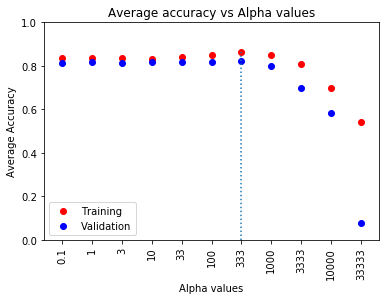


Best Alpha: 333


In [59]:
#plot graph
max_index_1  = np.argmax(train_accuracy)
max_index_2  = np.argmax(val_accuracy)
best_alpha = alpha[max_index_2]

plt.scatter(range(0,len(alpha)), train_accuracy, color='r', label='Training')
plt.scatter(range(0,len(alpha)), val_accuracy, color='b', label='Validation')
plt.xticks(range(0,len(alpha)), alpha, rotation='vertical') 
#plt.plot((np.argmax(train_accuracy), np.argmax(train_accuracy)), (0, val_accuracy[max_index_1]), ls='dotted')
plt.plot((np.argmax(val_accuracy), np.argmax(val_accuracy)), (0, train_accuracy[max_index_2]), ls='dotted')
axes = plt.gca()
axes.set_ylim([0, 1.0])
plt.xlabel('Alpha values')    
plt.ylabel('Average Accuracy')
plt.title('Average accuracy vs Alpha values')
plt.legend(loc="lower left")
plt.show()
print 
print "Best Alpha: {}".format(best_alpha)


From the plot, it can be seen that validation accuracy is almost the same or as good as training accuracy at alpha values 0.1, 1, 3, 10, 33 and 100. Whereas from alpha = 1000 to 33333, the validation performance is decreasing and produces gap between validation and training accuracy. This is a sign of high bias and underfitting.

Prediction performance

In [62]:
print "The original total no. of features: {}".format(train_X.shape[1])

#getting features
ovr = OneVsRestClassifier(LogisticRegression(C=1./best_alpha, penalty='l1')).fit(train_X, train_y)
ovr.coef_
model = SelectFromModel(ovr, prefit=True)

#non-zero features
train_X_new = model.transform(train_X)
test_X_new = model.transform(test_X)
print "The new no. of features (non-zero features): {}".format(train_X_new.shape[1])
print 

#train final model
final_model = OneVsRestClassifier(LogisticRegression(C=1./best_alpha, penalty='l1')).fit(train_X_new, train_y)
pred_label = final_model.predict(test_X_new)
true_label = test_y

cm = metrics.confusion_matrix(true_label, pred_label, labels = np.unique(data[:,0]))
print 'Confusion matrix of test set:'
print cm


The original total no. of features: 784
The new no. of features (non-zero features): 273

Confusion matrix of test set:
[[62  0  0  1  0  0  0  0  1  0]
 [ 0 88  0  0  0  0  0  0  1  0]
 [ 0  1 67  0  0  0  2  2  5  2]
 [ 0  0  3 70  0  4  1  1  3  2]
 [ 1  0  0  1 68  0  3  1  1  1]
 [ 3  1  2  4  0 52  3  1  4  2]
 [ 2  0  4  0  0  0 76  0  0  0]
 [ 1  1  2  0  1  0  0 65  1  7]
 [ 1  3  0  2  2  2  1  1 59  2]
 [ 0  0  0  0  7  1  1  1  1 48]]


In [63]:
classes = ['0', '1', '2', '3', '4', '5','6', '7', '8', '9']
print(classification_report(true_label, pred_label, target_names=classes))

tptn = cm.diagonal()
tpfpfntn = cm.sum(axis=1)
a = []
b= []
print "Accuracy"
for i in range(len(classes)):
    a.append(float(tptn[i]))
    b.append(float(tpfpfntn[i]))
    print round(a[i]/b[i], 2)

             precision    recall  f1-score   support

          0       0.89      0.97      0.93        64
          1       0.94      0.99      0.96        89
          2       0.86      0.85      0.85        79
          3       0.90      0.83      0.86        84
          4       0.87      0.89      0.88        76
          5       0.88      0.72      0.79        72
          6       0.87      0.93      0.90        82
          7       0.90      0.83      0.87        78
          8       0.78      0.81      0.79        73
          9       0.75      0.81      0.78        59

avg / total       0.87      0.87      0.87       756

Accuracy
0.97
0.99
0.85
0.83
0.89
0.72
0.93
0.83
0.81
0.81


#### Discussion

With lambda value of 333, the average accuracy value of test set is 0.87 while average accuracy of training set is 0.864. Since the test set has better performance, this model is not overfitted.